In [9]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

from tqdm import tqdm
from imblearn.over_sampling import SMOTE




sns.set_theme(style='whitegrid')

# Minority Classes

Bellow you can appreciate a table of the minority class percentage.

| Dataset | Minority Percentage | SMOTE Increase | SMOTE Dataset Size |
| :------ | :-----------------: | :------------: | :----------------: |
| Taiwaneese Bankruptcy | 3.22% | 6,379 | 13,198 |
| Spambase | 39.4% | 975 | 5,576 |
| SPECT | 20.6% | 157 | 424 |

In [2]:
with open('datasets/TBankrupcy.pkl', 'rb') as jar:
    bank = pickle.load(jar)
bank['y'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [6]:
220/6599

0.03333838460372784

In [3]:
with open('datasets/spambase.pkl', 'rb') as jar:
    spam = pickle.load(jar)
spam['y'].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [5]:
1 - (1813/2788)

0.34971305595408897

In [4]:
with open('datasets/SPECT.pkl', 'rb') as jar:
    spect = pickle.load(jar)
spect['y'].value_counts()

1    212
0     55
Name: 0, dtype: int64

In [3]:
55/212

0.25943396226415094

In [5]:
with open('datasets/3000_skin.pkl', 'rb') as jar:
    skin = pickle.load(jar)
skin['y'].value_counts()

 1    2377
-1     623
Name: Class, dtype: int64

In [2]:
623/2377

0.26209507782919644

Iirs dataset: 33.33%

# Experimenting with SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

# Import data
with open('datasets/SPECT.pkl', 'rb') as jar:
    data_pkl = pickle.load(jar)
SPECT = data_pkl['X']
if True:
    SPECT['bias'] = 1
# Pre-process data
data = SPECT.to_numpy()
labels = data_pkl['y']
# Use valid Perceptron values
labels.replace(0, -1, inplace=True)
labels.replace(1, 1, inplace=True)

# SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=25, random_state=42)
_data, _labels = sm.fit_resample(data, labels)

print(f'Original data shape: {data.shape} | New data shape: {_data.shape}')

Original data shape: (267, 45) | New data shape: (424, 45)


In [19]:
_data

array([[59, 52, 70, ..., 64, 67,  1],
       [72, 62, 69, ..., 56, 58,  1],
       [71, 62, 70, ..., 51, 46,  1],
       ...,
       [70, 76, 73, ..., 58, 56,  1],
       [70, 72, 68, ..., 64, 63,  1],
       [62, 66, 67, ..., 61, 58,  1]])

## Investigated SMOTE

[Text(-80.0, 0, ''),
 Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, '')]

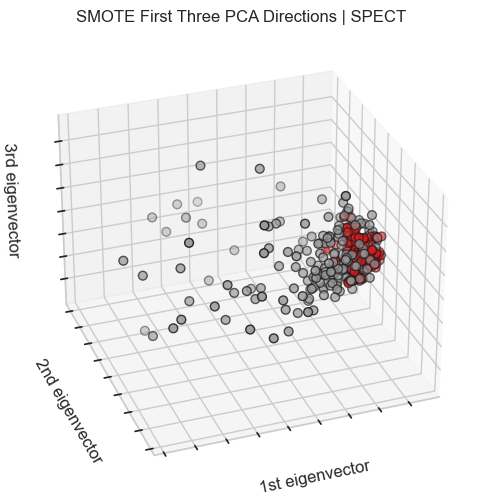

In [23]:

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)



X_reduced = PCA(n_components=3).fit_transform(_data)
ax.scatter(X_reduced[:, 0],
           X_reduced[:, 1],
           X_reduced[:, 2],
          c=_labels,
          cmap=plt.cm.Set1,
          edgecolor="k",
          s=40)
ax.set_title("SMOTE First Three PCA Directions | SPECT")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

[Text(-80.0, 0, ''),
 Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, '')]

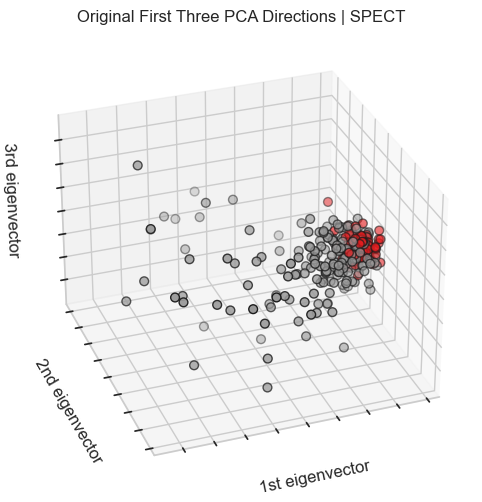

In [22]:

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)



X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(X_reduced[:, 0],
           X_reduced[:, 1],
           X_reduced[:, 2],
          c=labels,
          cmap=plt.cm.Set1,
          edgecolor="k",
          s=40)
ax.set_title("Original First Three PCA Directions | SPECT")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

Text(0.5, 1.0, 'SMOTE Data')

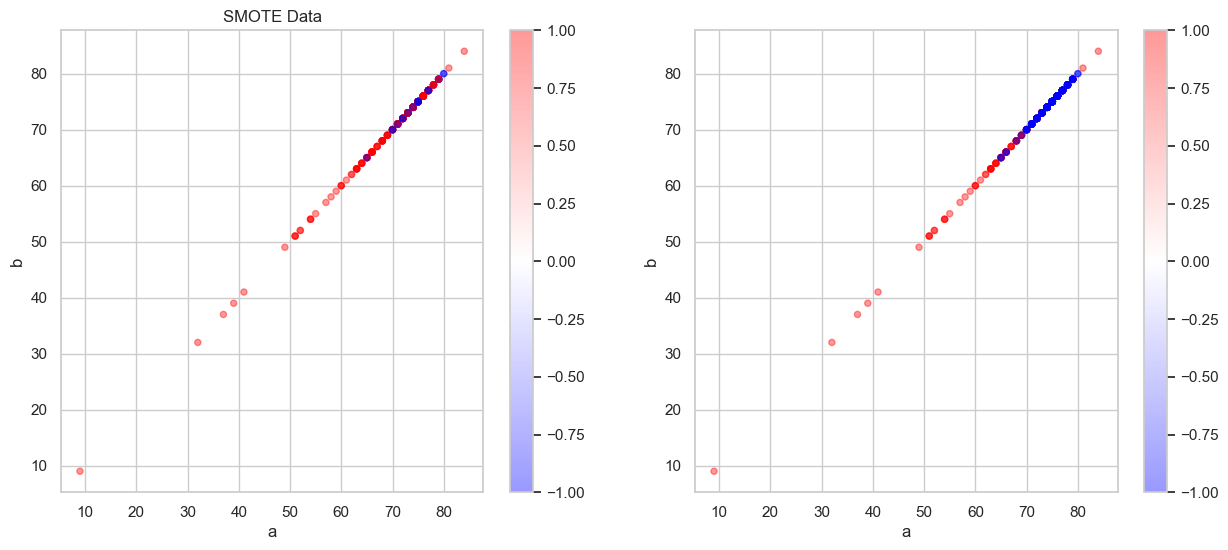

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

a = 31
b = 31

pd.DataFrame({'a': data[:, a], 'b': data[:, b]}).plot.scatter('a', 'b', c=labels, colormap='bwr', ax=axes[0], alpha=0.4)
axes[0].set_title('Original Data')
pd.DataFrame({'a': _data[:, a], 'b': _data[:, b]}).plot.scatter('a', 'b', c=_labels, colormap='bwr', ax=axes[1], alpha=0.4)
axes[0].set_title('SMOTE Data')

## Original SMOTE

In [37]:
print(f'Original data shape: {data.shape} | New data shape: {_data.shape}')

Original data shape: (267, 45) | New data shape: (424, 45)


<AxesSubplot: xlabel='a', ylabel='b'>

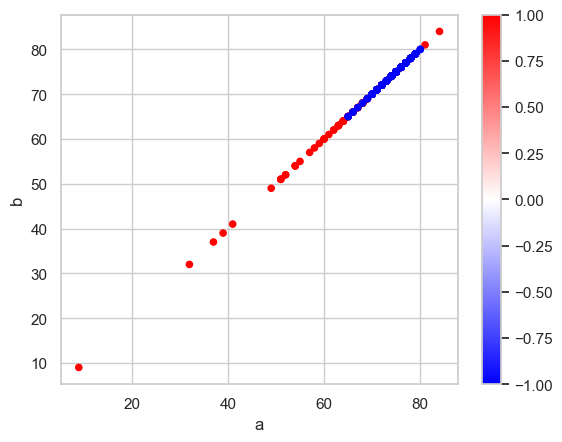

In [138]:
pd.DataFrame({'a': _data[:, 31], 'b': _data[:, 31]}).plot.scatter('a', 'b', c=_labels, colormap='bwr')

# Spambase Dataset SMOTE

In [185]:
from imblearn.over_sampling import SMOTE

# Import data
with open('datasets/spambase.pkl', 'rb') as jar:
    data_pkl = pickle.load(jar)
spambase = data_pkl['X']
if True:
    spambase['bias'] = 1
# Pre-process data
data = spambase.to_numpy()
labels = data_pkl['y']
# Use valid Perceptron values
labels.replace(0, -1, inplace=True)
labels.replace(1, 1, inplace=True)

# SMOTE
sm = SMOTE(sampling_strategy='all', k_neighbors=2, random_state=42)
_data, _labels = sm.fit_resample(data, labels)

print(f'Original data shape: {data.shape} | New data shape: {_data.shape}')

Original data shape: (4601, 58) | New data shape: (5576, 58)


## Investigated SMOTE

Text(0.5, 1.0, 'SMOTE Data')

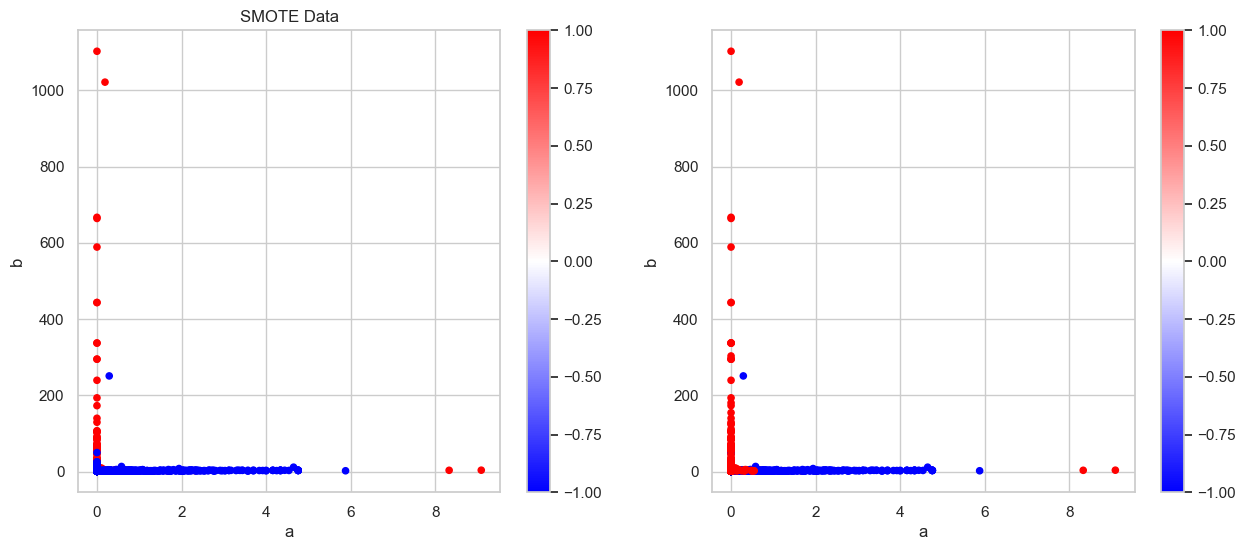

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

a = 27
b = 54

pd.DataFrame({'a': data[:, a], 'b': data[:, b]}).plot.scatter('a', 'b', c=labels, colormap='bwr', ax=axes[0])
axes[0].set_title('Original Data')
pd.DataFrame({'a': _data[:, a], 'b': _data[:, b]}).plot.scatter('a', 'b', c=_labels, colormap='bwr', ax=axes[1])
axes[0].set_title('SMOTE Data')

# Taiwan Bankruptcy Database SMOTE

In [189]:
from imblearn.over_sampling import SMOTE

# Import data
with open('datasets/TBankrupcy.pkl', 'rb') as jar:
    data_pkl = pickle.load(jar)
bankruptcy = data_pkl['X']
if True:
    bankruptcy['bias'] = 1
# Pre-process data
data = bankruptcy.to_numpy()
labels = data_pkl['y']
# Use valid Perceptron values
labels.replace(0, -1, inplace=True)
labels.replace(1, 1, inplace=True)

# SMOTE
sm = SMOTE(sampling_strategy='all', k_neighbors=10, random_state=42)
_data, _labels = sm.fit_resample(data, labels)

print(f'Original data shape: {data.shape} | New data shape: {_data.shape}')

Original data shape: (6819, 96) | New data shape: (13198, 96)


## Investigated SMOTE

Text(0.5, 1.0, 'SMOTE Data')

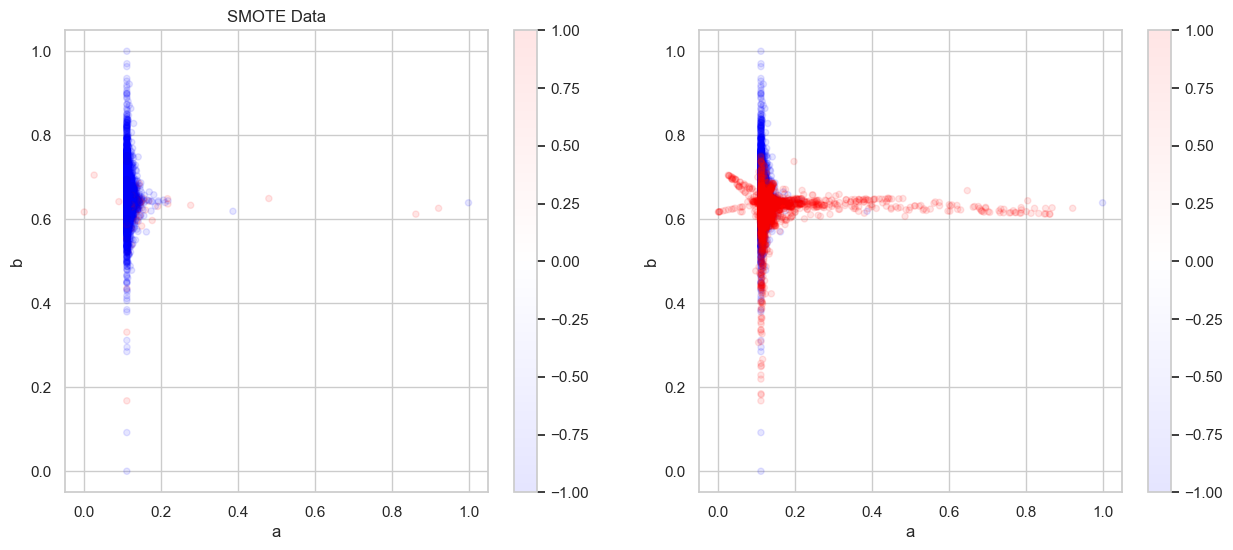

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

a = 78
b = 79

pd.DataFrame({'a': data[:, a], 'b': data[:, b]}).plot.scatter('a', 'b', c=labels, colormap='bwr', ax=axes[0], alpha=0.1)
axes[0].set_title('Original Data')
pd.DataFrame({'a': _data[:, a], 'b': _data[:, b]}).plot.scatter('a', 'b', c=_labels, colormap='bwr', ax=axes[1], alpha=0.1)
axes[0].set_title('SMOTE Data')

In [151]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [152]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
with open('results/SPECT_feb7/SPECT_11_results.pkl', 'rb') as jar:
    data = pickle.load(jar)

In [33]:
perceptron = data['history']['best_model'][0]['model']

In [38]:
pred = perceptron.solve(data)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(labels, pred)

0.7712264150943396

In [192]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42, n_iter_no_change=2_000, max_iter=10_000)
clf.fit(_data, _labels)
clf.score(_data, _labels)

0.4967419305955448

In [155]:
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 1000,
 'n_jobs': None,
 'penalty': None,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.datasets import load_digits

In [43]:
X, y = load_digits(return_X_y=True)

In [45]:
X.shape

(1797, 64)

In [46]:
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X, y)
clf.score(X, y)

0.9282136894824707

In [180]:
y[4]

4

<AxesSubplot: >

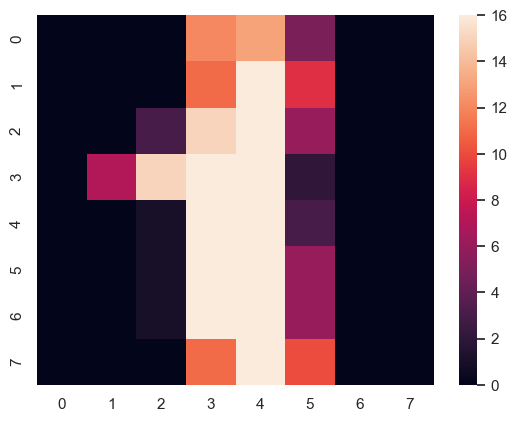

In [184]:
sns.heatmap(X.reshape(-1, 8, 8)[1])

In [64]:
clf.predict(data)

array([ 1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

In [73]:
clf.coef_.T

array([[  5502.],
       [ -1929.],
       [  -485.],
       [  1195.],
       [  2748.],
       [   -90.],
       [ -7266.],
       [   523.],
       [  3307.],
       [-16416.],
       [  7255.],
       [  1363.],
       [ 10716.],
       [ -9145.],
       [ -2372.],
       [  8878.],
       [ -7832.],
       [  9487.],
       [ -6027.],
       [  6305.],
       [ -1687.],
       [  1708.],
       [  7040.],
       [  1923.],
       [ -9400.],
       [ -7730.],
       [ 10678.],
       [ -4039.],
       [ -6636.],
       [   129.],
       [ 11041.],
       [-14674.],
       [ -9670.],
       [ 12068.],
       [ 18797.],
       [ -2256.],
       [  2359.],
       [ -2089.],
       [   562.],
       [ -9757.],
       [  3751.],
       [ -6998.],
       [ -6366.],
       [  4477.],
       [ 15199.]])

In [74]:
perceptron.W

array([[  199.98259436],
       [ -102.58028581],
       [   27.27043732],
       [  -37.989353  ],
       [  416.9596939 ],
       [ -372.73626384],
       [  391.81780553],
       [  406.51924292],
       [  296.39604963],
       [   79.20889021],
       [  849.77605544],
       [  636.45868393],
       [  -44.50007388],
       [ -659.84057884],
       [   49.13124805],
       [    4.1730904 ],
       [  594.12191555],
       [  305.64925511],
       [  430.67719385],
       [  121.16431875],
       [  631.13885482],
       [   73.29973702],
       [  259.57721255],
       [ -822.33258986],
       [ -762.88333122],
       [-1857.80756821],
       [  641.25888186],
       [ -561.00808399],
       [ -671.39694633],
       [-1241.59798402],
       [  714.35059372],
       [   65.0994177 ],
       [  741.4295641 ],
       [  603.02108096],
       [  682.01597838],
       [  258.31577737],
       [  836.99691182],
       [  299.46045501],
       [ -773.64123202],
       [-1267.6635088 ],


In [193]:
from imblearn.over_sampling import SMOTE

# Import data
with open('../datasets/syn_non_data.pkl', 'rb') as jar:
    data_pkl = pickle.load(jar)
syn_non = data_pkl['X']
if True:
    syn_non['bias'] = 1
# Pre-process data
data = syn_non.to_numpy()
labels = data_pkl['y']
# Use valid Perceptron values
labels.replace(0, -1, inplace=True)
labels.replace(1, 1, inplace=True)

# SMOTE
sm = SMOTE(sampling_strategy='all', k_neighbors=10, random_state=42)
_data, _labels = sm.fit_resample(data, labels)

print(f'Original data shape: {data.shape} | New data shape: {_data.shape}')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [195]:
pd.DataFrame(data_pkl['y']).value_counts()

-1.0    1491
 1.0    1009
dtype: int64

In [197]:
syn_non.shape

(2500, 5)

<AxesSubplot: xlabel='a', ylabel='b'>

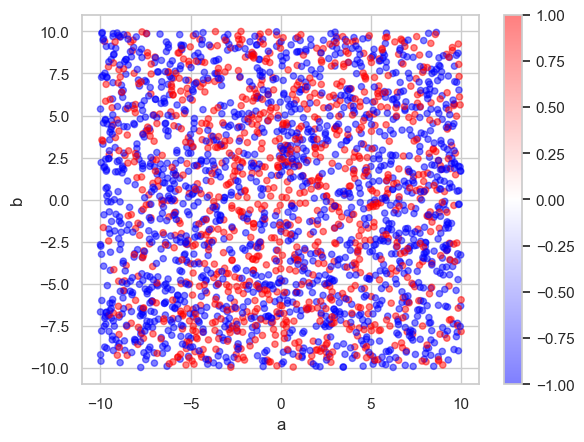

In [207]:
a = 1
b = 3
pd.DataFrame({'a': syn_non[:, a], 'b': syn_non[:, b]}).plot.scatter('a', 'b', c=data_pkl['y'], colormap='bwr', alpha=0.5)


In [211]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42, n_iter_no_change=1_000, max_iter=20_000)
clf.fit(syn_non, data_pkl['y'])
clf.score(syn_non, data_pkl['y'])

/home/joseaguilar/miniconda3/envs/sklearn-ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9024

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

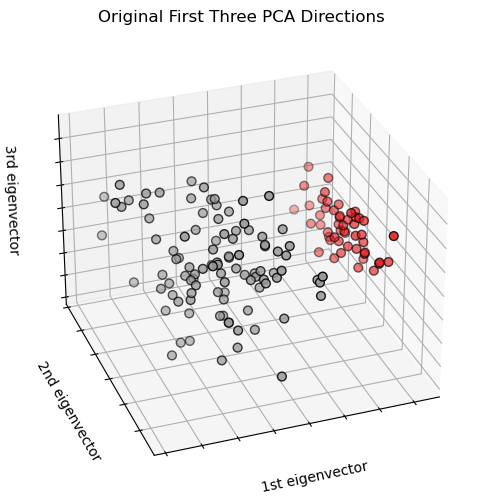

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X = iris.data
y = pd.DataFrame(iris.target)
y.replace(0, -1, inplace=True)
y.replace(1, 1, inplace=True)
y.replace(2, 1, inplace=True)
y = y.to_numpy()

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0],
           X_reduced[:, 1],
           X_reduced[:, 2],
          c=iris.target,
          cmap=plt.cm.Set1,
          edgecolor="k",
          s=40)
ax.set_title("Original First Three PCA Directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

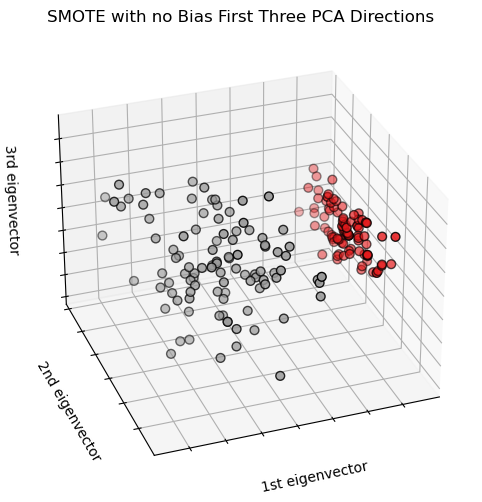

In [9]:
from imblearn.over_sampling import SMOTE

iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X = iris.data
y = pd.DataFrame(iris.target)
y.replace(0, -1, inplace=True)
y.replace(1, 1, inplace=True)
y.replace(2, 1, inplace=True)
y = y.to_numpy()

# SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
_X, _y = sm.fit_resample(X, y)

_X_reduced = PCA(n_components=3).fit_transform(_X)
ax.scatter(_X_reduced[:, 0],
           _X_reduced[:, 1],
           _X_reduced[:, 2],
          c=_y,
          cmap=plt.cm.Set1,
          edgecolor="k",
          s=40)

ax.set_title("SMOTE with no Bias First Three PCA Directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])





[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

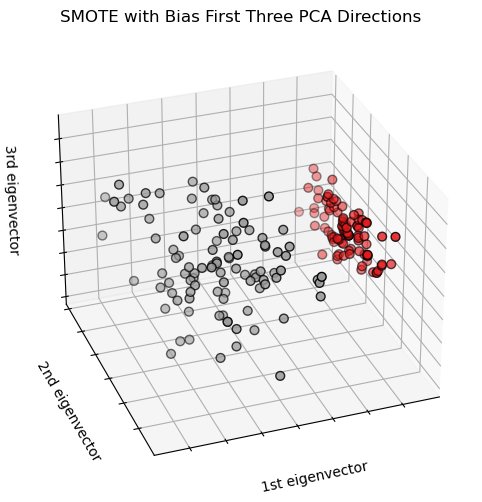

In [10]:
from imblearn.over_sampling import SMOTE

iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X = pd.DataFrame(iris.data)
X['bias'] = 1
X = X.to_numpy()
y = pd.DataFrame(iris.target)
y.replace(0, -1, inplace=True)
y.replace(1, 1, inplace=True)
y.replace(2, 1, inplace=True)
y = y.to_numpy()

# SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
_X, _y = sm.fit_resample(X, y)

_X_reduced = PCA(n_components=3).fit_transform(_X)
ax.scatter(_X_reduced[:, 0],
           _X_reduced[:, 1],
           _X_reduced[:, 2],
          c=_y,
          cmap=plt.cm.Set1,
          edgecolor="k",
          s=40)

ax.set_title("SMOTE with Bias First Three PCA Directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])





In [12]:
_X

array([[5.1       , 3.5       , 1.4       , 0.2       , 1.        ],
       [4.9       , 3.        , 1.4       , 0.2       , 1.        ],
       [4.7       , 3.2       , 1.3       , 0.2       , 1.        ],
       [4.6       , 3.1       , 1.5       , 0.2       , 1.        ],
       [5.        , 3.6       , 1.4       , 0.2       , 1.        ],
       [5.4       , 3.9       , 1.7       , 0.4       , 1.        ],
       [4.6       , 3.4       , 1.4       , 0.3       , 1.        ],
       [5.        , 3.4       , 1.5       , 0.2       , 1.        ],
       [4.4       , 2.9       , 1.4       , 0.2       , 1.        ],
       [4.9       , 3.1       , 1.5       , 0.1       , 1.        ],
       [5.4       , 3.7       , 1.5       , 0.2       , 1.        ],
       [4.8       , 3.4       , 1.6       , 0.2       , 1.        ],
       [4.8       , 3.        , 1.4       , 0.1       , 1.        ],
       [4.3       , 3.        , 1.1       , 0.1       , 1.        ],
       [5.8       , 4.        , 1.

In [230]:
import Perceptron.perceptron as pn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

n_buckets = 25
test_size = 0.2
train_size = None
smote = True
sgd = False
rng = np.random.default_rng(42)
dataset = 'syn_non_4'

if dataset == 'iris':
    iris = datasets.load_iris()
    X = pd.DataFrame(iris.data)
    X['bias'] = 1
    X = X.to_numpy()
    y = pd.DataFrame(iris.target)
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)
    y.replace(2, 1, inplace=True)
    y = y.to_numpy()

elif dataset == 'SPECT':    
    with open('datasets/SPECT.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    X = data_pkl['X']
    if True:
        X['bias'] = 1
    # Pre-process data
    X = X.to_numpy()
    y = data_pkl['y']
    # Use valid Perceptron values
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)
    y = y.to_numpy()
    #spect['y'].value_counts()
    
elif dataset == 'spambase':
    with open('datasets/spambase.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    spambase = data_pkl['X']
    if True:
        spambase['bias'] = 1
    X = spambase.to_numpy()
    y = data_pkl['y']
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)
    y = y.to_numpy()
    
elif dataset == 'bankrupcy':
    with open('datasets/TBankrupcy.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = data_pkl['X']
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)

elif dataset == 'syn_non_4':
    with open('../datasets/synthetic_non_n_3000_dims_4_bounds_-10_10.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = pd.DataFrame(data_pkl['X'])
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']

elif dataset == 'syn_non_10':
    with open('../datasets/synthetic_non_n_3000_dims_10_bounds_-10_10.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = pd.DataFrame(data_pkl['X'])
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']
    
elif dataset == 'syn_non_25':
    with open('../datasets/synthetic_non_n_3000_dims_25_bounds_-10_10.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = pd.DataFrame(data_pkl['X'])
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']
    
elif dataset == 'syn_non_50':
    with open('../datasets/synthetic_non_n_3000_dims_50_bounds_-10_10.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = pd.DataFrame(data_pkl['X'])
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']
    
elif dataset == 'syn_non_100':
    with open('../datasets/synthetic_non_n_3000_dims_100_bounds_-10_10.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    bank = pd.DataFrame(data_pkl['X'])
    if True:
        bank['bias'] = 1
    X = bank.to_numpy()
    y = data_pkl['y']
    

model_params = {
    'input'      : X.shape[-1],
    'eta'        : 1,
    'max_iter'   : 500,
    'rand_seed'  : None,
    'ignore_flag': True,
    'patience'   : 500, 
}


sss = StratifiedShuffleSplit(
    n_splits=1, 
    test_size=test_size, 
    train_size=train_size,
    random_state=None #seed + run # This way data is shuffled differently every run!
)
for train_i, test_i in sss.split(X, y):
    train_data, train_labels = X[train_i], y[train_i]
    test_data, test_labels = X[test_i], y[test_i]
test_labels = test_labels.reshape(-1, 1)
    
# SMOTE
if smote:
    sm = SMOTE(random_state=42)
    train_data, train_labels = sm.fit_resample(train_data, train_labels)
    train_labels = train_labels.reshape(-1, 1)
    
    
# We just need to bucketize the training data now (Testing data used as is)
train_data, train_labels = shuffle(train_data, train_labels)

train_data   = np.array_split(train_data, n_buckets) # split rises exception if not even!
train_data   = pd.Series(train_data) # Helps in keeping bucket structure
train_labels = np.array_split(train_labels, n_buckets)
train_labels = pd.Series(train_labels)

# Data saving
test_result_matrix = {
    'buckets': [],
    'accuracy': [],
}
train_result_matrix = {
    'buckets': [],
    'accuracy': [],
}

for buckets in tqdm(range(1, n_buckets + 1)):

    # Choose buckets to be used.
    indices = rng.choice(range(0, len(train_data)), size=buckets, replace=False)
    #import pdb; pdb.set_trace()

    X       = np.concatenate(train_data[indices].values)
    Y       = np.concatenate(train_labels[indices].values)
    #Y       = Y.reshape(-1, 1)

    #import pdb; pdb.set_trace()

    # Train model
    if sgd:
        model = Perceptron(max_iter=model_params['max_iter'],
                           n_iter_no_change=model_params['patience'],
                           eta0=model_params['eta'])
        model.fit(X, Y)
        pred = model.predict(test_data)
        test_accuracy = accuracy_score(pred, test_labels)
        train_accuracy = accuracy_score(model.predict(X), Y)
    else:
        model = pn.PocketPerceptron(**model_params)
        model.train(X, Y)
        pred = model.solve(test_data)
        test_accuracy = accuracy_score(pred, test_labels)
        train_accuracy = accuracy_score(model.solve(X), Y)

    # Measure zero-one & store
    
    
    # Save results
    test_result_matrix['buckets'].append(buckets)
    test_result_matrix['accuracy'].append(test_accuracy)
    
    train_result_matrix['buckets'].append(buckets)
    train_result_matrix['accuracy'].append(train_accuracy)


 56%|███████████████████████████████████▎                           | 14/25 [00:58<00:45,  4.16s/it]


KeyboardInterrupt: 

<AxesSubplot: xlabel='buckets'>

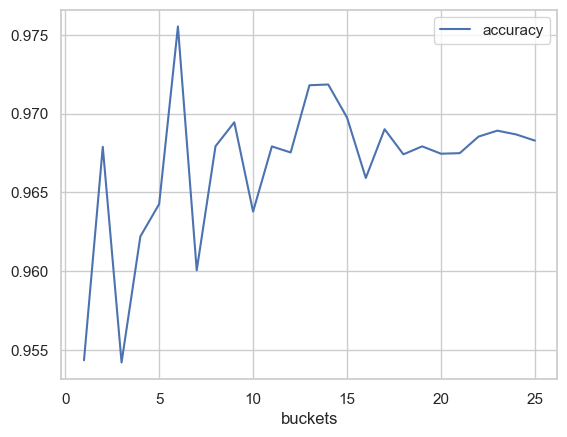

In [221]:
pd.DataFrame(train_result_matrix).plot('buckets', 'accuracy')

<AxesSubplot: xlabel='buckets'>

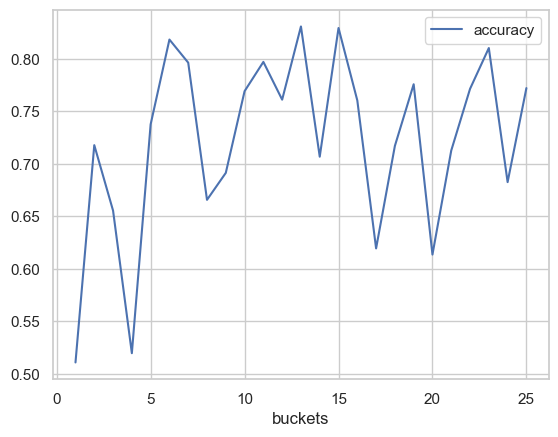

In [225]:
pd.DataFrame(test_result_matrix).plot('buckets', 'accuracy')

In [175]:
Y

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])

In [133]:
train_labels

0      [1, -1, 1]
1     [-1, 1, -1]
2      [1, 1, -1]
3       [1, 1, 1]
4      [1, -1, 1]
         ...     
95         [1, 1]
96         [1, 1]
97        [-1, 1]
98         [1, 1]
99         [1, 1]
Length: 100, dtype: object

In [139]:
test_labels

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1]])

In [138]:
Y

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],

In [108]:
X

array([[64, 63, 62, 59, 60, 61, 70, 74, 68, 63, 66, 68, 64, 66, 67, 66,
        72, 68, 63, 59, 75, 72, 67, 62, 63, 55, 66, 56, 65, 64, 70, 71,
        61, 63, 67, 63, 69, 69, 77, 65, 74, 62, 60, 54,  1],
       [69, 71, 70, 78, 61, 63, 67, 65, 59, 59, 66, 69, 71, 75, 65, 58,
        60, 55, 62, 59, 67, 66, 74, 74, 64, 60, 57, 54, 70, 73, 69, 76,
        62, 64, 61, 61, 66, 65, 72, 73, 68, 68, 59, 63,  1],
       [78, 75, 69, 66, 69, 71, 75, 75, 67, 67, 58, 50, 44, 47, 63, 73,
        75, 77, 73, 76, 36, 42, 48, 43, 61, 61, 71, 73, 62, 64, 39, 37,
        28, 30, 68, 71, 73, 69, 72, 74, 65, 68, 56, 55,  1],
       [57, 43, 62, 50, 43, 57, 61, 44, 44, 24, 53, 36, 60, 69, 58, 61,
        30, 32, 61, 63, 75, 72, 62, 71, 42, 44, 67, 74, 29, 19, 76, 77,
        65, 66, 41, 41, 57, 46, 27, 12, 41, 52, 42, 49,  1],
       [71, 56, 75, 74, 61, 69, 73, 73, 65, 63, 71, 69, 70, 74, 61, 64,
        70, 66, 70, 69, 76, 81, 62, 60, 39, 39, 72, 72, 58, 64, 71, 71,
        56, 55, 62, 61, 70, 75, 57, 

In [109]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [127]:
n_buckets = 50
dataset = 'SPECT'

if dataset == 'iris':
    iris = datasets.load_iris()
    X = pd.DataFrame(iris.data)
    X['bias'] = 1
    X = X.to_numpy()
    y = pd.DataFrame(iris.target)
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)
    y.replace(2, 1, inplace=True)
    y = y.to_numpy().reshape(-1, 1)

elif dataset == 'SPECT':    
    with open('datasets/SPECT.pkl', 'rb') as jar:
        data_pkl = pickle.load(jar)
    X = data_pkl['X']
    if True:
        X['bias'] = 1
    # Pre-process data
    X = X.to_numpy()
    y = data_pkl['y']
    # Use valid Perceptron values
    y.replace(0, -1, inplace=True)
    y.replace(1, 1, inplace=True)
    y = y.to_numpy().reshape(-1, 1)
    #spect['y'].value_counts()

sss2 = StratifiedShuffleSplit(n_splits=n_buckets, train_size=1/n_buckets)
for train_i, _ in sss2.split(X, y):
    print(y[train_i])

[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
[[ 1]
 [

In [124]:
y.shape

(267, 1)

In [176]:
X.shape

(26, 45)

In [177]:
Y.shape

(26, 1)

In [182]:
from sklearn.utils import shuffle
data, label = shuffle(X, Y)

In [187]:
label

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])

In [186]:
Y

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])